In [23]:
import tensorflow as tf

import tensorflow_datasets as tfds

from IPython.display import clear_output
import matplotlib.pyplot as plt

import os
import sys
import random

import numpy as np
import cv2

from tensorflow import keras

import functools
from log_calls import log_calls

In [4]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

2022-11-29 20:56:36.003362: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                  | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                  | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                      | 0/18 [00:01<?, ? MiB/s]

Dl Size...:   0%|                                     | 0/773 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|                             | 1/773 [00:02<27:10,  2.11s/ MiB]

Dl Size...:   0%|                             | 2/773 [00:02<27:08,  2.11s/ MiB]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|                             | 3/773 [00:02<07:41,  1.67 MiB/s]

Dl Size...:   1%|▏                            | 4/773 [00:02<07:40,  1.67 MiB/s]

Dl Size...:   1%|▏                            | 5/773 [00:02<07:40,  1.67 MiB/s]

Extraction compl

Dl Size...:  10%|██▊                         | 79/773 [00:05<00:34, 20.07 MiB/s]

Dl Size...:  10%|██▉                         | 80/773 [00:05<00:34, 20.07 MiB/s]

Dl Size...:  10%|██▉                         | 81/773 [00:05<00:34, 20.07 MiB/s]

Dl Size...:  11%|██▉                         | 82/773 [00:05<00:35, 19.74 MiB/s]

Dl Size...:  11%|███                         | 83/773 [00:05<00:34, 19.74 MiB/s]

Dl Size...:  11%|███                         | 84/773 [00:05<00:34, 19.74 MiB/s]

Dl Size...:  11%|███                         | 85/773 [00:05<00:32, 21.27 MiB/s]

Dl Size...:  11%|███                         | 86/773 [00:05<00:32, 21.27 MiB/s]

Dl Size...:  11%|███▏                        | 87/773 [00:06<00:32, 21.27 MiB/s]

Dl Size...:  11%|███▏                        | 88/773 [00:06<00:32, 21.18 MiB/s]

Dl Size...:  12%|███▏                        | 89/773 [00:06<00:32, 21.18 MiB/s]

Dl Size...:  12%|███▎                        | 90/773 [00:06<00:32, 21.18 MiB/s]

Dl Size...:  12%

Dl Size...:  21%|█████▌                     | 160/773 [00:09<00:30, 20.38 MiB/s]

Dl Size...:  21%|█████▌                     | 161/773 [00:09<00:30, 20.35 MiB/s]

Dl Size...:  21%|█████▋                     | 162/773 [00:09<00:30, 20.35 MiB/s]

Dl Size...:  21%|█████▋                     | 163/773 [00:09<00:29, 20.35 MiB/s]

Dl Size...:  21%|█████▋                     | 164/773 [00:09<00:30, 19.87 MiB/s]

Dl Size...:  21%|█████▊                     | 165/773 [00:09<00:30, 19.87 MiB/s]

Dl Size...:  21%|█████▊                     | 166/773 [00:10<00:31, 19.21 MiB/s]

Dl Size...:  22%|█████▊                     | 167/773 [00:10<00:31, 19.21 MiB/s]

Dl Size...:  22%|█████▊                     | 168/773 [00:10<00:31, 19.12 MiB/s]

Dl Size...:  22%|█████▉                     | 169/773 [00:10<00:31, 19.12 MiB/s]

Dl Size...:  22%|█████▉                     | 170/773 [00:10<00:31, 19.12 MiB/s]

Dl Size...:  22%|█████▉                     | 171/773 [00:10<00:30, 19.50 MiB/s]

Dl Size...:  22%

Dl Size...:  31%|████████▍                  | 241/773 [00:13<00:27, 19.70 MiB/s]

Dl Size...:  31%|████████▍                  | 242/773 [00:13<00:26, 19.70 MiB/s]

Dl Size...:  31%|████████▍                  | 243/773 [00:13<00:26, 19.70 MiB/s]

Dl Size...:  32%|████████▌                  | 244/773 [00:13<00:27, 19.41 MiB/s]

Dl Size...:  32%|████████▌                  | 245/773 [00:13<00:27, 19.41 MiB/s]

Dl Size...:  32%|████████▌                  | 246/773 [00:13<00:27, 19.41 MiB/s]

Dl Size...:  32%|████████▋                  | 247/773 [00:14<00:25, 20.34 MiB/s]

Dl Size...:  32%|████████▋                  | 248/773 [00:14<00:25, 20.34 MiB/s]

Dl Size...:  32%|████████▋                  | 249/773 [00:14<00:25, 20.34 MiB/s]

Dl Size...:  32%|████████▋                  | 250/773 [00:14<00:25, 20.36 MiB/s]

Dl Size...:  32%|████████▊                  | 251/773 [00:14<00:25, 20.36 MiB/s]

Dl Size...:  33%|████████▊                  | 252/773 [00:14<00:25, 20.36 MiB/s]

Dl Size...:  33%

Dl Size...:  42%|███████████▏               | 321/773 [00:18<00:33, 13.61 MiB/s]

Dl Size...:  42%|███████████▏               | 322/773 [00:18<00:33, 13.61 MiB/s]

Dl Size...:  42%|███████████▎               | 323/773 [00:18<00:30, 14.52 MiB/s]

Dl Size...:  42%|███████████▎               | 324/773 [00:18<00:30, 14.52 MiB/s]

Dl Size...:  42%|███████████▎               | 325/773 [00:18<00:30, 14.52 MiB/s]

Dl Size...:  42%|███████████▍               | 326/773 [00:18<00:28, 15.76 MiB/s]

Dl Size...:  42%|███████████▍               | 327/773 [00:18<00:28, 15.76 MiB/s]

Dl Size...:  42%|███████████▍               | 328/773 [00:18<00:28, 15.76 MiB/s]

Dl Size...:  43%|███████████▍               | 329/773 [00:18<00:26, 16.50 MiB/s]

Dl Size...:  43%|███████████▌               | 330/773 [00:18<00:26, 16.50 MiB/s]

Dl Size...:  43%|███████████▌               | 331/773 [00:18<00:25, 17.03 MiB/s]

Dl Size...:  43%|███████████▌               | 332/773 [00:18<00:25, 17.03 MiB/s]

Dl Size...:  43%

Dl Size...:  52%|█████████████▉             | 399/773 [00:22<00:23, 15.99 MiB/s]

Dl Size...:  52%|█████████████▉             | 400/773 [00:22<00:23, 15.99 MiB/s]

Dl Size...:  52%|██████████████             | 401/773 [00:22<00:23, 15.74 MiB/s]

Dl Size...:  52%|██████████████             | 402/773 [00:22<00:23, 15.74 MiB/s]

Dl Size...:  52%|██████████████             | 403/773 [00:22<00:23, 15.47 MiB/s]

Dl Size...:  52%|██████████████             | 404/773 [00:22<00:23, 15.47 MiB/s]

Dl Size...:  52%|██████████████▏            | 405/773 [00:22<00:23, 15.47 MiB/s]

Dl Size...:  53%|██████████████▏            | 406/773 [00:23<00:22, 16.39 MiB/s]

Dl Size...:  53%|██████████████▏            | 407/773 [00:23<00:22, 16.39 MiB/s]

Dl Size...:  53%|██████████████▎            | 408/773 [00:23<00:21, 17.04 MiB/s]

Dl Size...:  53%|██████████████▎            | 409/773 [00:23<00:21, 17.04 MiB/s]

Dl Size...:  53%|██████████████▎            | 410/773 [00:23<00:20, 17.47 MiB/s]

Dl Size...:  53%

Dl Size...:  62%|████████████████▋          | 478/773 [00:27<00:16, 17.59 MiB/s]

Dl Size...:  62%|████████████████▋          | 479/773 [00:27<00:17, 17.17 MiB/s]

Dl Size...:  62%|████████████████▊          | 480/773 [00:27<00:17, 17.17 MiB/s]

Dl Size...:  62%|████████████████▊          | 481/773 [00:27<00:17, 17.17 MiB/s]

Dl Size...:  62%|████████████████▊          | 482/773 [00:27<00:16, 17.25 MiB/s]

Dl Size...:  62%|████████████████▊          | 483/773 [00:27<00:16, 17.25 MiB/s]

Dl Size...:  63%|████████████████▉          | 484/773 [00:27<00:16, 17.25 MiB/s]

Dl Size...:  63%|████████████████▉          | 485/773 [00:27<00:16, 17.26 MiB/s]

Dl Size...:  63%|████████████████▉          | 486/773 [00:27<00:16, 17.26 MiB/s]

Dl Size...:  63%|█████████████████          | 487/773 [00:27<00:16, 17.26 MiB/s]

Dl Size...:  63%|█████████████████          | 488/773 [00:27<00:16, 17.22 MiB/s]

Dl Size...:  63%|█████████████████          | 489/773 [00:27<00:16, 17.22 MiB/s]

Dl Size...:  63%

Dl Size...:  72%|███████████████████▌       | 559/773 [00:31<00:11, 17.89 MiB/s]

Dl Size...:  72%|███████████████████▌       | 560/773 [00:31<00:11, 17.87 MiB/s]

Dl Size...:  73%|███████████████████▌       | 561/773 [00:31<00:11, 17.87 MiB/s]

Dl Size...:  73%|███████████████████▋       | 562/773 [00:31<00:11, 17.87 MiB/s]

Dl Size...:  73%|███████████████████▋       | 563/773 [00:31<00:11, 17.75 MiB/s]

Dl Size...:  73%|███████████████████▋       | 564/773 [00:31<00:11, 17.75 MiB/s]

Dl Size...:  73%|███████████████████▋       | 565/773 [00:31<00:11, 17.75 MiB/s]

Dl Size...:  73%|███████████████████▊       | 566/773 [00:31<00:11, 17.77 MiB/s]

Dl Size...:  73%|███████████████████▊       | 567/773 [00:31<00:11, 17.77 MiB/s]

Dl Size...:  73%|███████████████████▊       | 568/773 [00:32<00:11, 17.77 MiB/s]

Dl Size...:  74%|███████████████████▊       | 569/773 [00:32<00:11, 17.98 MiB/s]

Dl Size...:  74%|███████████████████▉       | 570/773 [00:32<00:11, 17.98 MiB/s]

Dl Size...:  74%

Dl Size...:  83%|██████████████████████▎    | 640/773 [00:35<00:07, 18.33 MiB/s]

Dl Size...:  83%|██████████████████████▍    | 641/773 [00:35<00:07, 18.33 MiB/s]

Dl Size...:  83%|██████████████████████▍    | 642/773 [00:36<00:07, 18.33 MiB/s]

Dl Size...:  83%|██████████████████████▍    | 643/773 [00:36<00:06, 18.62 MiB/s]

Dl Size...:  83%|██████████████████████▍    | 644/773 [00:36<00:06, 18.62 MiB/s]

Dl Size...:  83%|██████████████████████▌    | 645/773 [00:36<00:06, 18.62 MiB/s]

Dl Size...:  84%|██████████████████████▌    | 646/773 [00:36<00:06, 18.53 MiB/s]

Dl Size...:  84%|██████████████████████▌    | 647/773 [00:36<00:06, 18.53 MiB/s]

Dl Size...:  84%|██████████████████████▋    | 648/773 [00:36<00:06, 18.53 MiB/s]

Dl Size...:  84%|██████████████████████▋    | 649/773 [00:36<00:06, 18.14 MiB/s]

Dl Size...:  84%|██████████████████████▋    | 650/773 [00:36<00:06, 18.14 MiB/s]

Dl Size...:  84%|██████████████████████▋    | 651/773 [00:36<00:06, 18.14 MiB/s]

Dl Size...:  84%

Dl Size...:  93%|█████████████████████████▏ | 721/773 [00:40<00:02, 19.19 MiB/s]

Dl Size...:  93%|█████████████████████████▏ | 722/773 [00:40<00:02, 19.19 MiB/s]

Dl Size...:  94%|█████████████████████████▎ | 723/773 [00:40<00:02, 19.19 MiB/s]

Dl Size...:  94%|█████████████████████████▎ | 724/773 [00:40<00:02, 19.20 MiB/s]

Dl Size...:  94%|█████████████████████████▎ | 725/773 [00:40<00:02, 19.20 MiB/s]

Dl Size...:  94%|█████████████████████████▎ | 726/773 [00:40<00:02, 19.30 MiB/s]

Dl Size...:  94%|█████████████████████████▍ | 727/773 [00:40<00:02, 19.30 MiB/s]

Dl Size...:  94%|█████████████████████████▍ | 728/773 [00:40<00:02, 19.30 MiB/s]

Dl Size...:  94%|█████████████████████████▍ | 729/773 [00:40<00:02, 19.12 MiB/s]

Dl Size...:  94%|█████████████████████████▍ | 730/773 [00:40<00:02, 19.12 MiB/s]

Dl Size...:  95%|█████████████████████████▌ | 731/773 [00:40<00:02, 19.12 MiB/s]

Dl Size...:  95%|█████████████████████████▌ | 732/773 [00:40<00:01, 20.98 MiB/s]

Dl Size...:  95%

Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
Shuffling /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteN025J
2022-11-29 20:57:31.827157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-29 20:57:31.827577: I tensorf

Dataset oxford_iiit_pet downloaded and prepared to /Users/ember/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.
Metal device set to: Apple M1


In [5]:
image_size = 128

In [6]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask


@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (image_size, image_size))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (image_size, image_size))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask 


def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (image_size, image_size))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (image_size, image_size))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [7]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

print(TRAIN_LENGTH)
print(STEPS_PER_EPOCH)


3680
57


In [8]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)
                           
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)                           

2022-11-29 20:57:32.044400: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


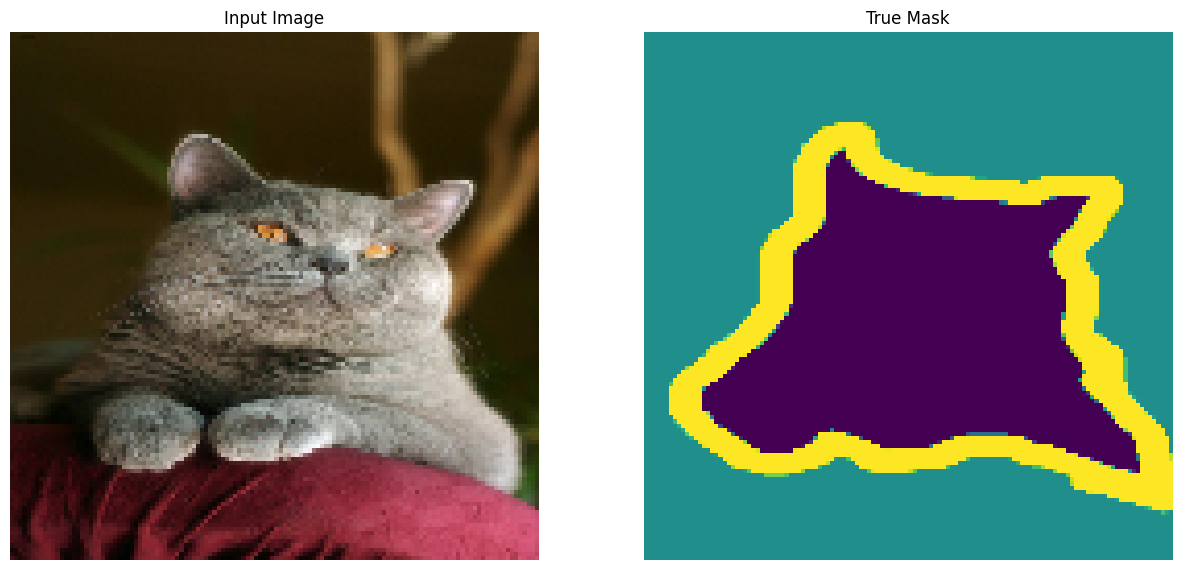

In [9]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

for image, mask in train.take(3):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])  

In [89]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p
@log_calls()
def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c
def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [158]:
def UNet():
    filter_sizes = [16, 32, 64, 128, 256]   #Number of conv. filters in each block
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    #p1 will go to the next down block and c1 will go to the matching up block
    
    c1, p1 = down_block(p0, filter_sizes[0]) #128 -> 64
    
    ########################################################
    #************* Complete the model here *****************
    #Your code should be only in this block. Add the corresponding 
    #down blocks, followed by the bottleneck block, followed by matching 
    #up blocks. 
    unzip = lambda l: [[v[i] for v in l] for i in range(len(l[0]))]
    def down(acc, nfilters):
        acc.append(down_block(acc[-1][-1], nfilters))
        return acc
    cs,ps = unzip(functools.reduce(log_calls()(down), filter_sizes[1:], [(c1, p1)]))
    u3 = functools.reduce(log_calls()(lambda u, cf: up_block(u, cf[0], cf[1])), 
                          list(zip(reversed(cs), filter_sizes[:-1])), 
                          bottleneck(ps[-1], filter_sizes[-1]))
    ########################################################
    u4 = up_block(u3, c1, filter_sizes[0]) #64 -> 128
    
    #outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    outputs = keras.layers.Conv2D(4, (1, 1), padding="same", activation="softmax")(u4)
    model = keras.models.Model(inputs, outputs)
    return model  

In [159]:
model = UNet()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

UNet.<locals>.down <== called by UNet
    arguments: acc=[(<KerasTensor: shape=(None, 128, 128, 16) dtype=float32 (created by layer 'conv2d_683')>, <KerasTensor: shape=(None, 64, 64, 16) dtype=float32 (created by layer 'max_pooling2d_249')>)], nfilters=32
UNet.<locals>.down ==> returning to UNet
UNet.<locals>.down <== called by UNet
    arguments: acc=[(<KerasTensor: shape=(None, 128, 128, 16) dtype=float32 (created by layer 'conv2d_683')>, <KerasTensor: shape=(None, 64, 64, 16) dtype=float32 (created by layer 'max_pooling2d_249')>), (<KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv2d_685')>, <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'max_pooling2d_250')>)], nfilters=64
UNet.<locals>.down ==> returning to UNet
UNet.<locals>.down <== called by UNet
    arguments: acc=[(<KerasTensor: shape=(None, 128, 128, 16) dtype=float32 (created by layer 'conv2d_683')>, <KerasTensor: shape=(None, 64, 64, 16) dtype=float32 (created by layer 'max

                                                                                                  
 conv2d_689 (Conv2D)            (None, 16, 16, 128)  147584      ['conv2d_688[0][0]']             
                                                                                                  
 max_pooling2d_252 (MaxPooling2  (None, 8, 8, 128)   0           ['conv2d_689[0][0]']             
 D)                                                                                               
                                                                                                  
 conv2d_690 (Conv2D)            (None, 8, 8, 256)    295168      ['max_pooling2d_252[0][0]']      
                                                                                                  
 conv2d_691 (Conv2D)            (None, 8, 8, 256)    590080      ['conv2d_690[0][0]']             
                                                                                                  
 max_pooli

In [160]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 0s 26ms/step


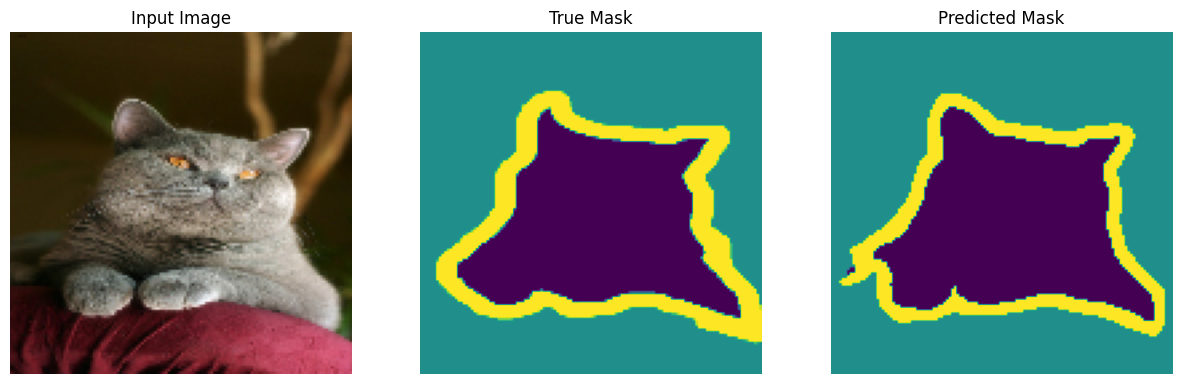


Sample Prediction after epoch 15

57/57 [==============================] - 54s 951ms/step - loss: 0.2156 - accuracy: 0.9070 - val_loss: 0.3793 - val_accuracy: 0.8657


In [165]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))



EPOCHS = 15
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

2/2 [==============================] - 1s 253ms/step


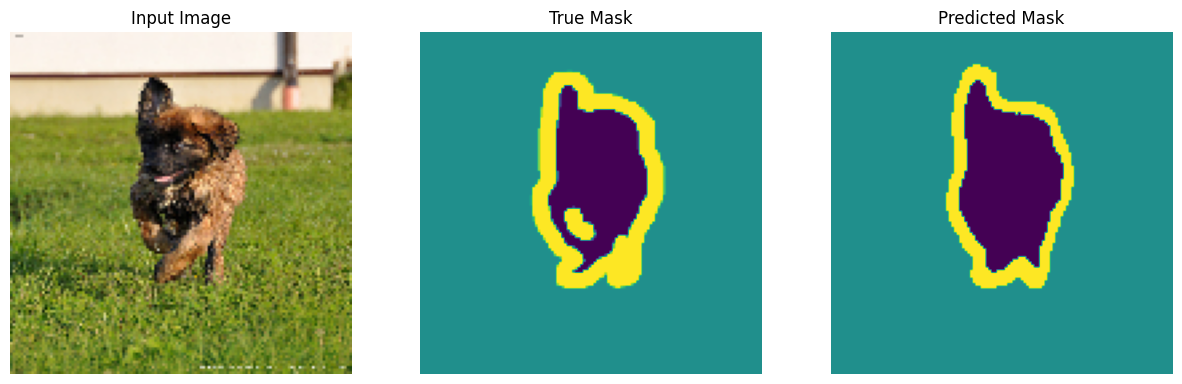

2/2 [==============================] - 0s 147ms/step


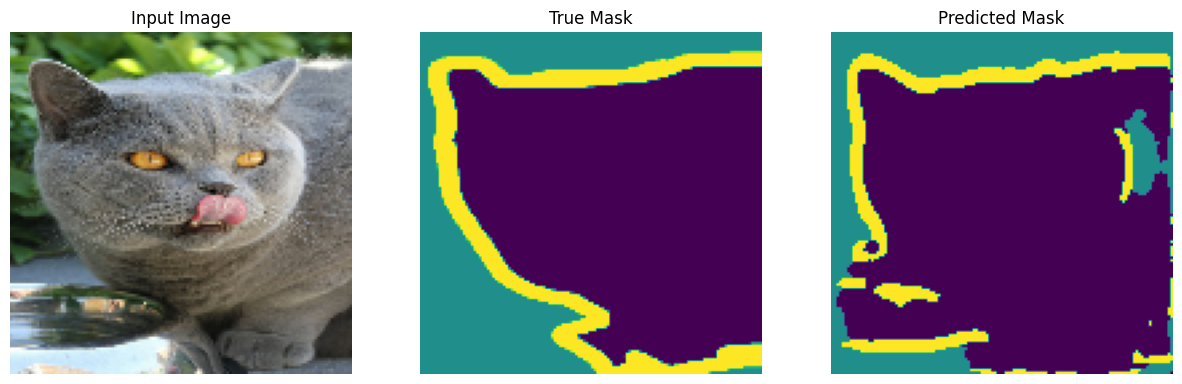

2/2 [==============================] - 0s 170ms/step


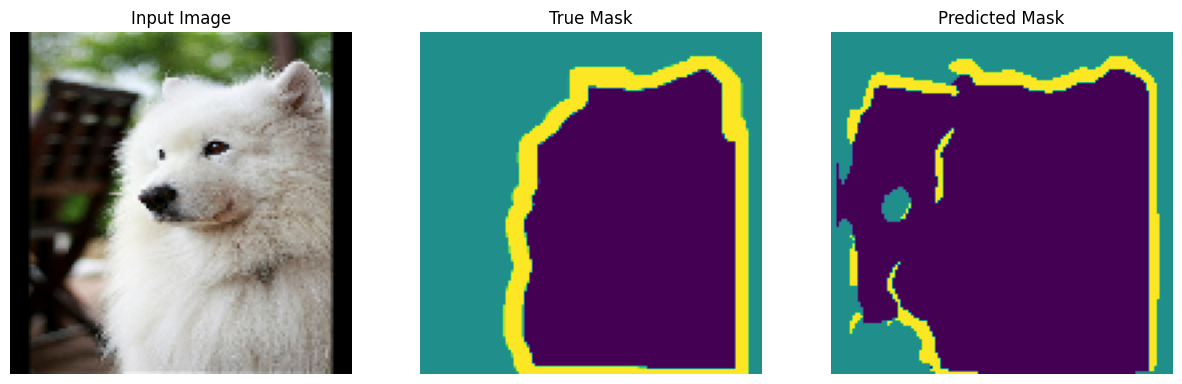

In [164]:
show_predictions(test_dataset, 3)      